In [1]:
import pandas as pd
import numpy as np
from graph_tool.all import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.cm
import os
import json
from itertools import combinations

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
VISUALIZATION_DIR = './data/data_visualization_final_project/'
ALL_FEATURE_DIR = './data/all_features/'

## Load data

In [3]:
REGION = 'euw1'
TIER = 'GRANDMASTER'
DIVISION = 'I'

In [4]:
df = pd.read_parquet(os.path.join(ALL_FEATURE_DIR, f'all_features_{REGION}_{TIER}_{DIVISION}.parquet'))

In [5]:
# extract data for visualizing the network
df = df[['metadata_match_id', 'puuid', 'units', 'placement', 'win']]

In [6]:
df['unit_name'] = df['units'].apply(lambda x: set([i['unit_name'] for i in x]))
# df['unit_cost'] = df['units'].apply(lambda x: [i['unit_cost'] for i in x])
# df['unit_tier'] = df['units'].apply(lambda x: [i['unit_tier'] for i in x])

In [7]:
df.head()

,metadata_match_id,puuid,units,placement,win,unit_name
0,EUW1_7289163708,ethATAyD3EkNZiq7D6vUoYh7RlgVc9VIzguBCDIf_F7_xx...,"[{'unit_name': 'Zyra', 'unit_cost': 1, 'unit_t...",4,1,"{Zyra, LeBlanc, Nami, Cassiopeia, Swain, Black..."
1,EUW1_7288673061,3sI4CLwsA5Zo_o0K3qrGAd9qsXIATzGo37Dd3u6-qWqGNp...,"[{'unit_name': 'Powder', 'unit_cost': 1, 'unit...",1,1,"{Rumble, Trundle, Powder, Urgot, Ekko, Elise, ..."
2,EUW1_7279178279,ethATAyD3EkNZiq7D6vUoYh7RlgVc9VIzguBCDIf_F7_xx...,"[{'unit_name': 'Steb', 'unit_cost': 1, 'unit_t...",1,1,"{Steb, Jayce, Caitlyn, Ambessa, Jayce's summon..."
3,EUW1_7290840195,NDevon8F8IXMnMldVugKUZploITOUl4zQb4AGfP1pHQo8r...,"[{'unit_name': 'Amumu', 'unit_cost': 1, 'unit_...",8,0,"{Caitlyn, Ambessa, Blitzcrank, Twitch, Nocturn..."
4,EUW1_7279275400,OT8Qwqe4ZyPXR9Sr82qtdju214V6rjNW4-JKx0ywfgTxR9...,"[{'unit_name': 'Morgana', 'unit_cost': 1, 'uni...",3,1,"{Morgana, Nunu & Willump, Renata Glasc, Leona,..."


## Load reference data

In [8]:
# create the vertices - all units from set 13
DATA_DRAGON_DIR = './data/data_dragon/set13/'

In [9]:
with open(os.path.join(DATA_DRAGON_DIR, 'units.json'), 'r') as file:
    units = json.load(file)

In [10]:
SET13_UNITS = [units[i]['name'] for i in units]

In [11]:
SET13_UNITS

['Singed',
 'Renata Glasc',
 'Silco',
 'Camille',
 'Blitzcrank',
 'Vi',
 'Caitlyn',
 'Ekko',
 'Amumu',
 'Malzahar',
 'Dr. Mundo',
 'Twitch',
 'Akali',
 'Sett',
 'Ezreal',
 'Illaoi',
 'Draven',
 'Rell',
 'Cassiopeia',
 'Vladimir',
 'Elise',
 'LeBlanc',
 'Heimerdinger',
 'Jayce',
 'Trundle',
 'Ziggs',
 'Rumble',
 'Smeech',
 'Sevika',
 'Renni',
 'Loris',
 'Steb',
 'Maddie',
 'Powder',
 'Vander',
 'Scar',
 'Nunu & Willump',
 'Jinx',
 'Zeri',
 'Violet',
 'Nami',
 'Corki',
 'Garen',
 'Vex',
 'Nocturne',
 'Darius',
 'Irelia',
 'Ambessa',
 'Zyra',
 'Gangplank',
 'Leona',
 "Kog'Maw",
 'Twisted Fate',
 'Lux',
 'Mordekaiser',
 'Morgana',
 'Tristana',
 'Swain',
 'Urgot',
 'Zoe',
 'Viktor',
 'Mel',
 'Warwick']

In [12]:
units

{'TFT13_Singed': {'id': 'TFT13_Singed',
  'name': 'Singed',
  'tier': 1,
  'image': {'full': 'TFT13_Singed.TFT_Set13.png',
   'sprite': 'tft-champion3.png',
   'group': 'tft-champion',
   'x': 192,
   'y': 0,
   'w': 48,
   'h': 48}},
 'TFT13_RenataGlasc': {'id': 'TFT13_RenataGlasc',
  'name': 'Renata Glasc',
  'tier': 2,
  'image': {'full': 'TFT13_RenataGlasc.TFT_Set13.png',
   'sprite': 'tft-champion3.png',
   'group': 'tft-champion',
   'x': 240,
   'y': 0,
   'w': 48,
   'h': 48}},
 'TFT13_Silco': {'id': 'TFT13_Silco',
  'name': 'Silco',
  'tier': 4,
  'image': {'full': 'TFT13_Silco.TFT_Set13.png',
   'sprite': 'tft-champion3.png',
   'group': 'tft-champion',
   'x': 288,
   'y': 0,
   'w': 48,
   'h': 48}},
 'TFT13_Camille': {'id': 'TFT13_Camille',
  'name': 'Camille',
  'tier': 2,
  'image': {'full': 'TFT13_Camille.TFT_Set13.png',
   'sprite': 'tft-champion3.png',
   'group': 'tft-champion',
   'x': 336,
   'y': 0,
   'w': 48,
   'h': 48}},
 'TFT13_Blitzcrank': {'id': 'TFT13_Blit

In [13]:
unit_costs = {units[i]['name']: units[i]['tier'] for i in units}

unit_costs

{'Singed': 1,
 'Renata Glasc': 2,
 'Silco': 4,
 'Camille': 2,
 'Blitzcrank': 3,
 'Vi': 4,
 'Caitlyn': 5,
 'Ekko': 4,
 'Amumu': 1,
 'Malzahar': 5,
 'Dr. Mundo': 4,
 'Twitch': 4,
 'Akali': 2,
 'Sett': 2,
 'Ezreal': 3,
 'Illaoi': 4,
 'Draven': 1,
 'Rell': 2,
 'Cassiopeia': 3,
 'Vladimir': 2,
 'Elise': 4,
 'LeBlanc': 5,
 'Heimerdinger': 4,
 'Jayce': 5,
 'Trundle': 1,
 'Ziggs': 2,
 'Rumble': 5,
 'Smeech': 3,
 'Sevika': 5,
 'Renni': 3,
 'Loris': 3,
 'Steb': 1,
 'Maddie': 1,
 'Powder': 1,
 'Vander': 2,
 'Scar': 3,
 'Nunu & Willump': 3,
 'Jinx': 5,
 'Zeri': 2,
 'Violet': 1,
 'Nami': 3,
 'Corki': 4,
 'Garen': 4,
 'Vex': 1,
 'Nocturne': 2,
 'Darius': 1,
 'Irelia': 1,
 'Ambessa': 4,
 'Zyra': 1,
 'Gangplank': 3,
 'Leona': 2,
 "Kog'Maw": 3,
 'Twisted Fate': 3,
 'Lux': 1,
 'Mordekaiser': 5,
 'Morgana': 1,
 'Tristana': 2,
 'Swain': 3,
 'Urgot': 2,
 'Zoe': 4,
 'Viktor': 6,
 'Mel': 6,
 'Warwick': 6}

## Create network

In [14]:
# initialize empty graph
g = Graph(directed=False)

In [15]:
# Add a vertex property map to store names
vname = g.new_vp("string")

# add vertices to the graph and add vertex property
for unit in SET13_UNITS:
    v = g.add_vertex()
    vname[v] = unit

# Attach the property to the graph
g.vp["name"] = vname

In [16]:
# Print the vertices and the name
for v in g.vertices():
    print(f"Vertex {int(v)}: {g.vp['name'][v]}")

Vertex 0: Singed
Vertex 1: Renata Glasc
Vertex 2: Silco
Vertex 3: Camille
Vertex 4: Blitzcrank
Vertex 5: Vi
Vertex 6: Caitlyn
Vertex 7: Ekko
Vertex 8: Amumu
Vertex 9: Malzahar
Vertex 10: Dr. Mundo
Vertex 11: Twitch
Vertex 12: Akali
Vertex 13: Sett
Vertex 14: Ezreal
Vertex 15: Illaoi
Vertex 16: Draven
Vertex 17: Rell
Vertex 18: Cassiopeia
Vertex 19: Vladimir
Vertex 20: Elise
Vertex 21: LeBlanc
Vertex 22: Heimerdinger
Vertex 23: Jayce
Vertex 24: Trundle
Vertex 25: Ziggs
Vertex 26: Rumble
Vertex 27: Smeech
Vertex 28: Sevika
Vertex 29: Renni
Vertex 30: Loris
Vertex 31: Steb
Vertex 32: Maddie
Vertex 33: Powder
Vertex 34: Vander
Vertex 35: Scar
Vertex 36: Nunu & Willump
Vertex 37: Jinx
Vertex 38: Zeri
Vertex 39: Violet
Vertex 40: Nami
Vertex 41: Corki
Vertex 42: Garen
Vertex 43: Vex
Vertex 44: Nocturne
Vertex 45: Darius
Vertex 46: Irelia
Vertex 47: Ambessa
Vertex 48: Zyra
Vertex 49: Gangplank
Vertex 50: Leona
Vertex 51: Kog'Maw
Vertex 52: Twisted Fate
Vertex 53: Lux
Vertex 54: Mordekaiser
Ve

In [17]:
unit_vertices = {g.vp['name'][v]: v for v in g.vertices()}

unit_vertices

{'Singed': <Vertex object with index '0' at 0x7fd79d0c1070>,
 'Renata Glasc': <Vertex object with index '1' at 0x7fd79d0c10e0>,
 'Silco': <Vertex object with index '2' at 0x7fd79d0c1150>,
 'Camille': <Vertex object with index '3' at 0x7fd79d0c11c0>,
 'Blitzcrank': <Vertex object with index '4' at 0x7fd79d0c1230>,
 'Vi': <Vertex object with index '5' at 0x7fd79d0c12a0>,
 'Caitlyn': <Vertex object with index '6' at 0x7fd79d0c1310>,
 'Ekko': <Vertex object with index '7' at 0x7fd79d0c1380>,
 'Amumu': <Vertex object with index '8' at 0x7fd79d0c13f0>,
 'Malzahar': <Vertex object with index '9' at 0x7fd79d0c1460>,
 'Dr. Mundo': <Vertex object with index '10' at 0x7fd79d0c14d0>,
 'Twitch': <Vertex object with index '11' at 0x7fd79d0c1540>,
 'Akali': <Vertex object with index '12' at 0x7fd79d0c15b0>,
 'Sett': <Vertex object with index '13' at 0x7fd79d0c1620>,
 'Ezreal': <Vertex object with index '14' at 0x7fd79d0c1690>,
 'Illaoi': <Vertex object with index '15' at 0x7fd79d0c1700>,
 'Draven': <

In [18]:
# add edges to graph
def create_edges(unit_list):
    unit_list = set([i for i in unit_list if i in SET13_UNITS])    # exclude summon units
    return [(u1, u2) for (u1, u2) in combinations(unit_list, 2)]

In [19]:
# create edge property for weight
eweight = g.new_edge_property('int')


In [20]:
def add_weighted_edges_from_edgelist(g, edge_list, weight=1):
    for (unit1, unit2) in edge_list:
        # get vertex indices of units
        (v1, v2) = (unit_vertices[unit1], unit_vertices[unit2])
        # check if edge already exists
        edge_ = g.edge(v1, v2) or g.edge(v2, v1)
        if edge_:
            eweight[(v1, v2)] += weight  # Increase weight if edge exists
        else:
            edge_ = g.add_edge(v1, v2)  # Add new edge
            eweight[edge_] = weight  # Set initial weight

In [21]:
edge_ls = df['unit_name'].apply(create_edges)

In [22]:
edge_ls

0        [(Zyra, LeBlanc), (Zyra, Nami), (Zyra, Cassiop...
1        [(Rumble, Trundle), (Rumble, Powder), (Rumble,...
2        [(Steb, Jayce), (Steb, Caitlyn), (Steb, Ambess...
3        [(Caitlyn, Ambessa), (Caitlyn, Blitzcrank), (C...
4        [(Morgana, Nunu & Willump), (Morgana, Renata G...
                               ...                        
41403    [(Morgana, Viktor), (Morgana, Vex), (Morgana, ...
41404    [(Rumble, Trundle), (Rumble, Powder), (Rumble,...
41405    [(Morgana, Jayce), (Morgana, LeBlanc), (Morgan...
41406    [(Steb, Rumble), (Steb, Vi), (Steb, Loris), (S...
41407    [(Morgana, Sett), (Morgana, Vex), (Morgana, Nu...
Name: unit_name, Length: 41408, dtype: object

In [23]:
for ls in edge_ls:
    add_weighted_edges_from_edgelist(g, ls)

In [24]:
g.ep['weight'] = eweight

In [25]:
import cairo

In [26]:
# add champ bg splashart add vertex property
vsurface = g.new_vp('object')

CHAMP_IMG_DIR = './data/data_visualization_final_project/img/champs/'
# retrieve image link for each champ
unit_images = {units[champ]['name']: cairo.ImageSurface.create_from_png(os.path.join(CHAMP_IMG_DIR, units[champ]['image']['full'])) for champ in units}

for v in g.vertices():
    vsurface[v] = unit_images[g.vp['name'][v]]

g.vp['image'] = vsurface

## Get network adjacency matrix weighted

In [27]:
# from graph_tool.topology import adjacency

In [28]:
# adj = adjacency(g, weight=g.ep.weight)

In [29]:
# adj_mt = adj.toarray()

In [30]:
# adj_mt

array([[   0., 3057.,  752., ...,  423.,  304.,  259.],
       [3057.,    0.,  686., ...,  352.,  253.,  225.],
       [ 752.,  686.,    0., ...,  220.,  138.,  131.],
       ...,
       [ 423.,  352.,  220., ...,    0.,  407.,  483.],
       [ 304.,  253.,  138., ...,  407.,    0.,  329.],
       [ 259.,  225.,  131., ...,  483.,  329.,    0.]])

In [31]:
# len(adj_mt)

63

In [32]:
# # adj_mt[0, 1]

# for i in range(len(adj_mt)):
#     champ_name = g.vertices()[v]

TypeError: 'VertexIterator' object is not subscriptable

## Visualize network

In [33]:
# edge_weights = {e: g.ep['weight'][e] for e in g.edges()}

# # edge_weights

eweight.fa

PropertyArray([1182, 1583,  601, ...,    1,    1,    1], dtype=int32)

(array([1.482e+03, 2.210e+02, 9.900e+01, 4.600e+01, 4.600e+01, 1.600e+01,
        1.900e+01, 9.000e+00, 1.000e+00, 3.000e+00]),
 array([1.0000e+00, 8.3580e+02, 1.6706e+03, 2.5054e+03, 3.3402e+03,
        4.1750e+03, 5.0098e+03, 5.8446e+03, 6.6794e+03, 7.5142e+03,
        8.3490e+03]),
 <BarContainer object of 10 artists>)

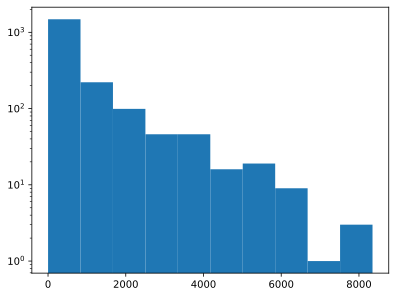

In [34]:
plt.hist(eweight.fa, log=True)

In [35]:
pd.Series(eweight.fa).describe()

count    1942.000000
mean      686.059732
std      1127.559782
min         1.000000
25%        45.000000
50%       208.000000
75%       784.750000
max      8349.000000
dtype: float64

In [36]:
pd.Series(eweight.fa).quantile(0.9)

1936.900000000001

In [37]:
vcolor = g.new_vp('vector<double>')

for v in g.vertices():
    if unit_costs[g.vp.name[v]] == 1:
        vcolor[v] = (0.5, 0.5, 0.5, 0.9)
    elif unit_costs[g.vp.name[v]] == 2:
        vcolor[v] = (0.0, 1.0, 0.0, 0.9)
    elif unit_costs[g.vp.name[v]] == 3:
        vcolor[v] = (0.0, 0.0, 1.0, 0.9)
    elif unit_costs[g.vp.name[v]] == 4:
        vcolor[v] = (0.5, 0.0, 0.5, 0.9)
    elif unit_costs[g.vp.name[v]] == 5:
        vcolor[v] = (1.0, 0.647, 0.0, 0.9)
    else:
        vcolor[v] = (1.0, 0.0, 0.0, 0.9)

g.vp['color'] = vcolor

In [38]:
# calculate unit play rate and winrate
df['unit_name'] = df['unit_name'].apply(lambda x: set(x))

unit_freq = (df.explode('unit_name')
                 .groupby(['metadata_match_id', 'puuid'])['unit_name'].value_counts().reset_index()
                 .groupby('unit_name')[['metadata_match_id', 'puuid']].count()
                 .drop('metadata_match_id', axis=1)
                 .rename(columns={'puuid': 'play_count'})
            )
unit_freq['play_rate'] = unit_freq['play_count'] / df.shape[0]

In [39]:
unit_freq

,play_count,play_rate
unit_name,,
Akali,2709,0.065422
Ambessa,10075,0.243310
Amumu,2154,0.052019
Black Rose Sion,6150,0.148522
Blitzcrank,1402,0.033858
...,...,...
Warwick,3703,0.089427
Zeri,2620,0.063273
Ziggs,1918,0.046320


In [40]:
unit_wr = df.explode('unit_name').groupby('unit_name')['win'].mean()

In [41]:
unit_wr

unit_name
Akali              0.493540
Ambessa            0.516526
Amumu              0.507892
Black Rose Sion    0.560325
Blitzcrank         0.477889
                     ...   
Warwick            0.776938
Zeri               0.474427
Ziggs              0.282586
Zoe                0.497559
Zyra               0.511116
Name: win, Length: 65, dtype: float64

In [42]:
vfreq = g.new_vp('float')

for v in g.vertices():
    vfreq[v] = unit_freq.loc[g.vp.name[v]]['play_rate']

g.vp.frequency = vfreq

In [43]:
vwr = g.new_vp('float')

for v in g.vertices():
    vwr[v] = unit_wr.loc[g.vp.name[v]]

g.vp.winrate = vwr

In [44]:
g.vp.frequency[0]

0.11036514683153013

In [61]:
# retain edges with weights >= threshold
threshold = pd.Series(eweight.fa).quantile(0.90)

efilt = g.new_ep('bool', vals=g.ep.weight.a >= threshold)
# vfilt = g.new_vp('bool', vals=g.vp.frequency.a >= 0.01)
u = GraphView(g, efilt=efilt)

In [62]:
from graph_tool.topology import label_largest_component

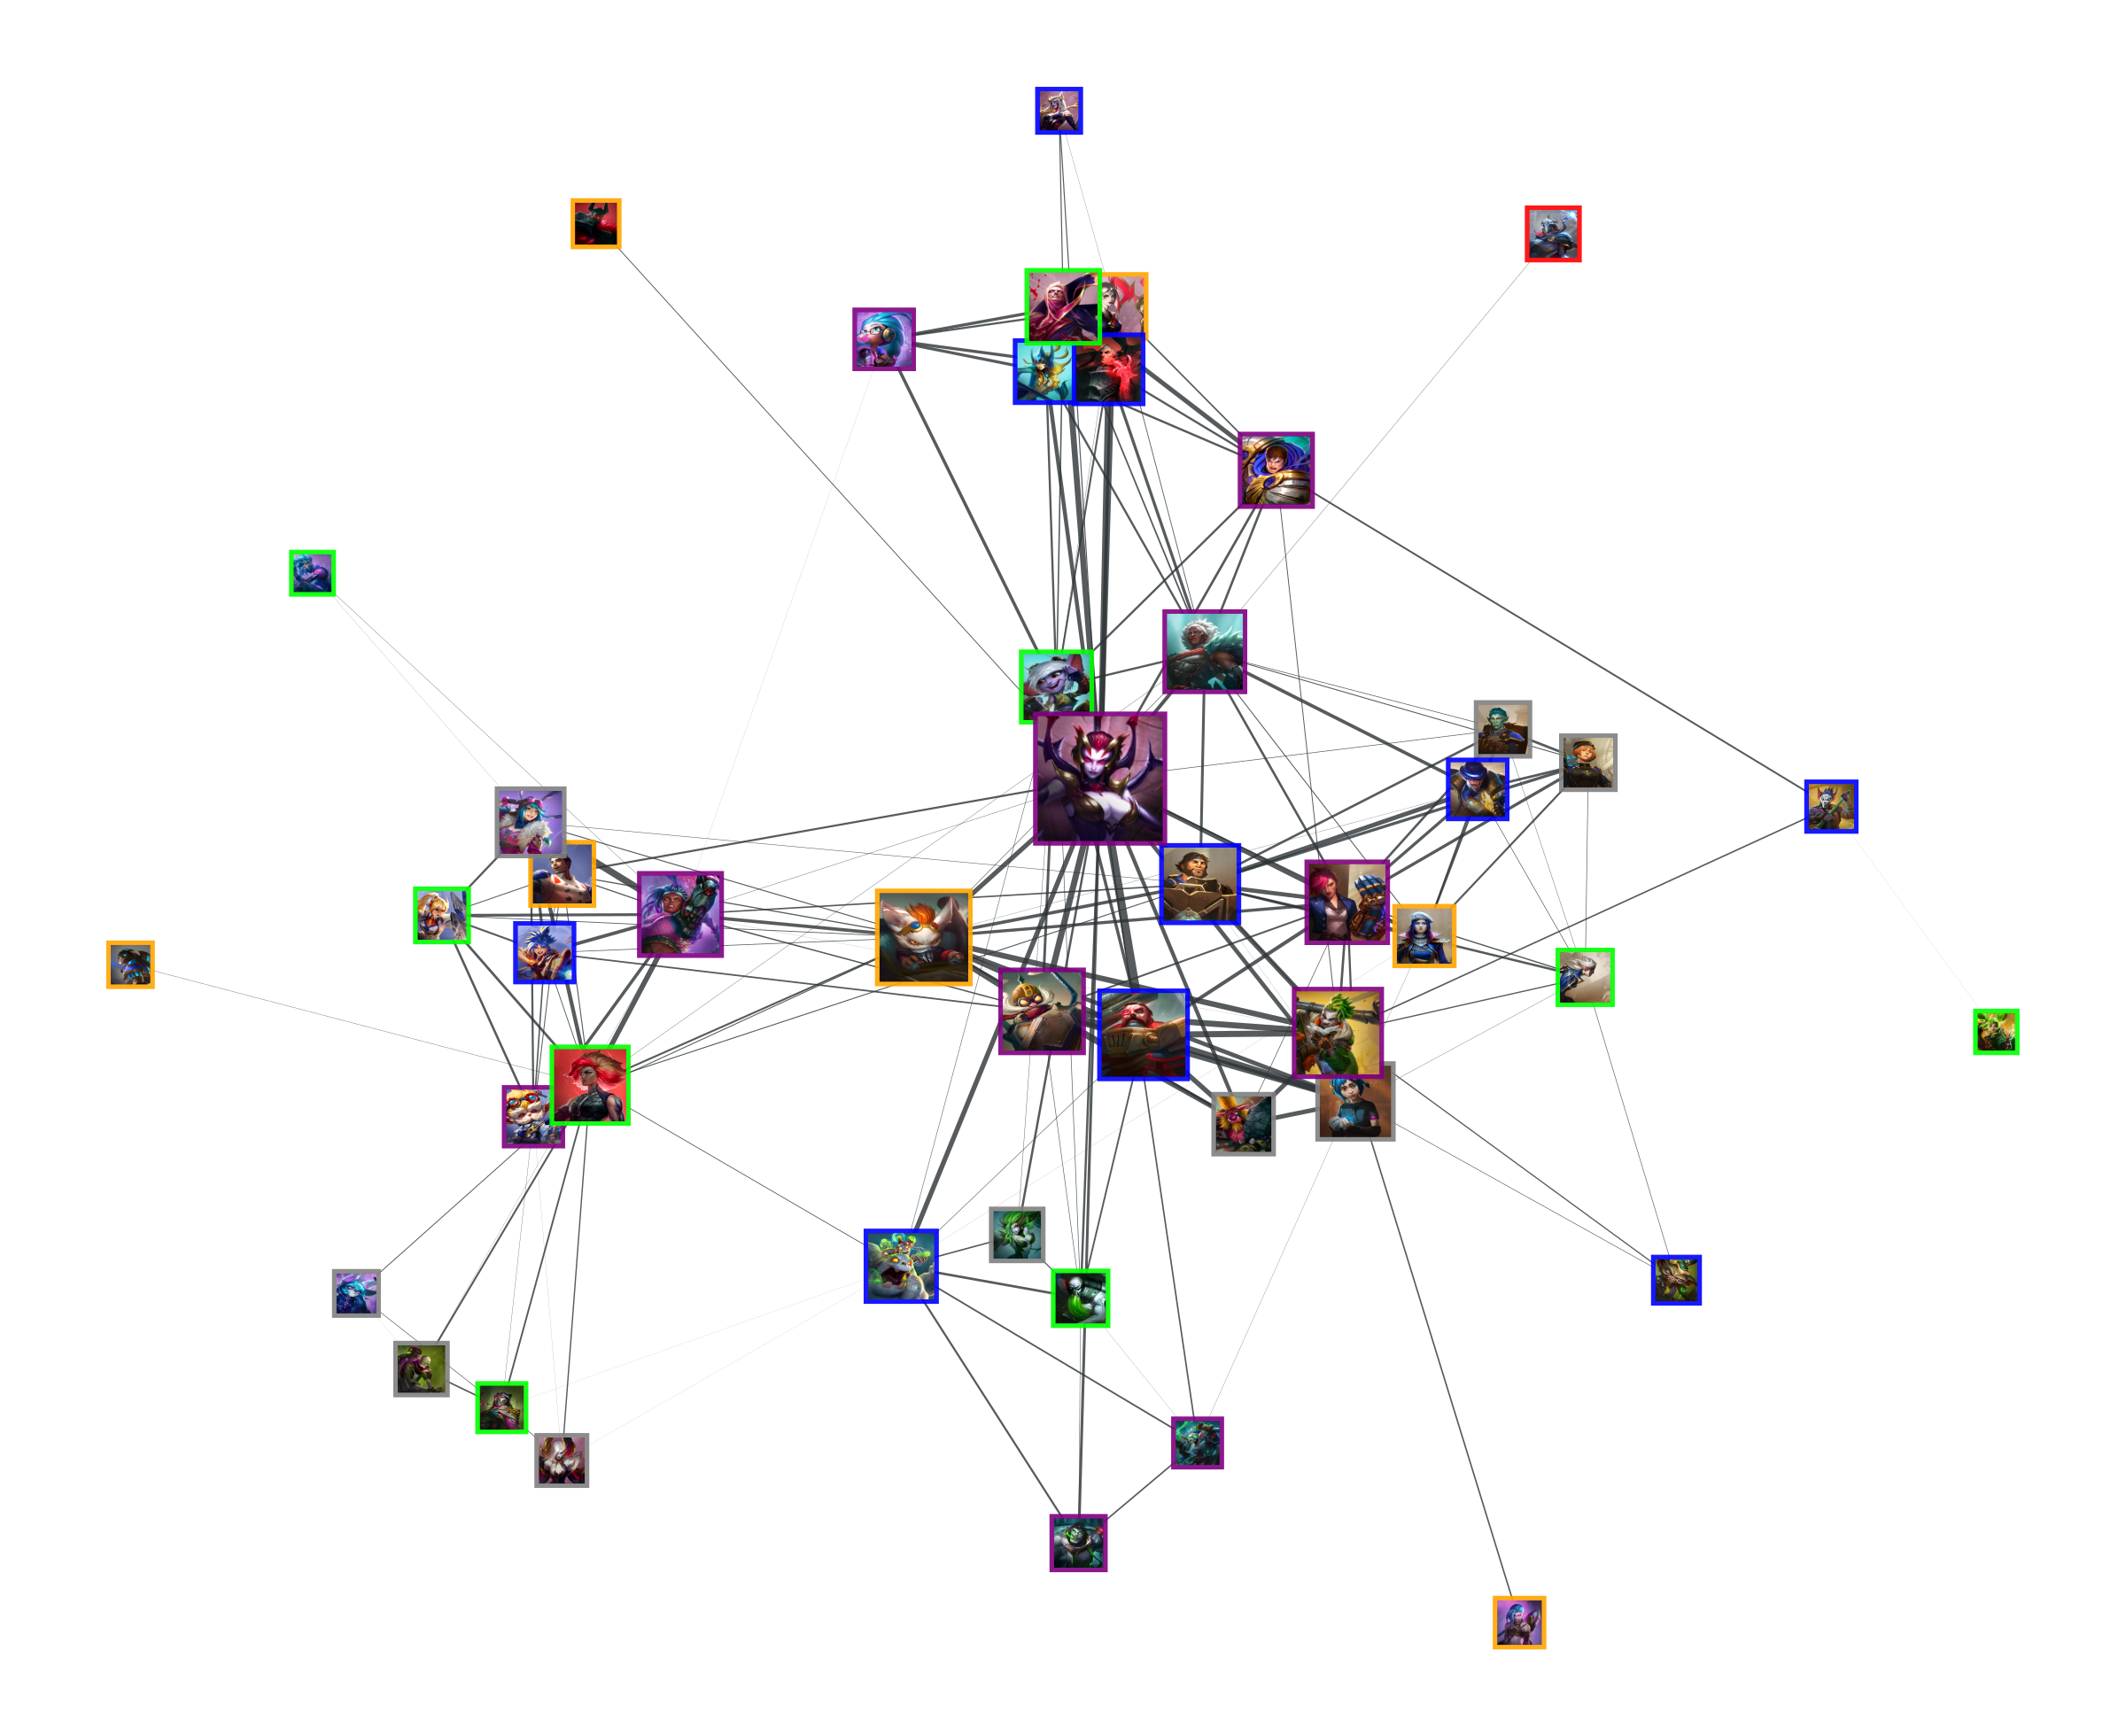

In [68]:
largest_component = label_largest_component(u)
u.set_vertex_filter(largest_component)

pos = arf_layout(u, d=100, a=8)
# pos = radial_tree_layout(u, u.vertex(20))
# pos = radial_tree_layout(u, u.vertex(26))
# pos = radial_tree_layout(u, u.vertex(17))
# pos = fruchterman_reingold_layout(u)
# edge weight 
edge_weight = prop_to_size(u.ep.weight, mi=0, ma=5, power=1)
vertex_size = prop_to_size(u.vp.frequency, mi=30, ma=100, power=1)   # scale vertex by play rate
# vertex_size = prop_to_size(u.vp.winrate, mi=20, ma=100, power=1)       # scale vertex by winrate
vertex_label = u.vp.name

# state.draw()
graph_draw(u, pos=pos,
           vertex_shape='square',
           vertex_size=vertex_size,  # Apply eigenvector for vertex size
           vertex_fill_color=u.vp.color,
           vertex_surface=g.vp.image,
           vertex_color=u.vp.color,
           vertex_pen_width=5,
           # vertex_text=vertex_label,
           # vertex_text_position=5,
           # vertex_text_offset=[-0.03, -0.01],
           vertex_font_size=14,
           vertex_text_out_color='white',
           vertex_text_out_width=2e-2,
           vorder=g.vp.frequency,
           edge_pen_width=edge_weight,
           eorder=g.ep.weight,
           # edge_color=edge_weight,
           output_size=(1200, 1200),
           # output='test_champ_network.pdf',
      );



In [54]:
for v in g.vertices():
    print(v, g.vp.name[v])

0 Singed
1 Renata Glasc
2 Silco
3 Camille
4 Blitzcrank
5 Vi
6 Caitlyn
7 Ekko
8 Amumu
9 Malzahar
10 Dr. Mundo
11 Twitch
12 Akali
13 Sett
14 Ezreal
15 Illaoi
16 Draven
17 Rell
18 Cassiopeia
19 Vladimir
20 Elise
21 LeBlanc
22 Heimerdinger
23 Jayce
24 Trundle
25 Ziggs
26 Rumble
27 Smeech
28 Sevika
29 Renni
30 Loris
31 Steb
32 Maddie
33 Powder
34 Vander
35 Scar
36 Nunu & Willump
37 Jinx
38 Zeri
39 Violet
40 Nami
41 Corki
42 Garen
43 Vex
44 Nocturne
45 Darius
46 Irelia
47 Ambessa
48 Zyra
49 Gangplank
50 Leona
51 Kog'Maw
52 Twisted Fate
53 Lux
54 Mordekaiser
55 Morgana
56 Tristana
57 Swain
58 Urgot
59 Zoe
60 Viktor
61 Mel
62 Warwick
